In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

%matplotlib inline

In [7]:
#Reading the data
wine_data = pd.read_csv("winequality-red.csv")

In [8]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [9]:
#Calculate the mean, frequency, min, max and standard deviation.
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Since we are going to predict the factors for better wine 'quality', let us plot some information about it.

<Axes: xlabel='quality', ylabel='Count'>

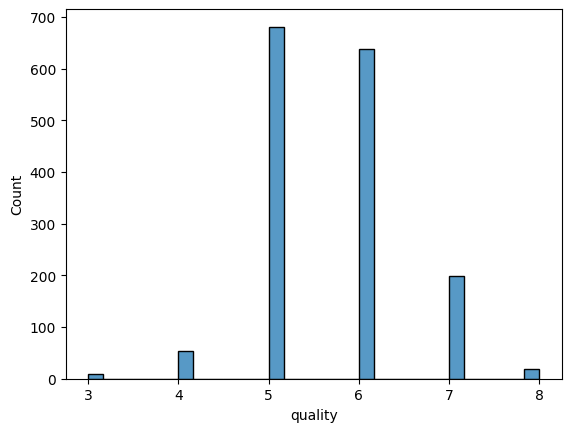

In [10]:
sb.histplot(data=wine_data, x='quality')

In [11]:
wine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

#### Observation: We can see that the wine quality ranges between 3 and 8. The attribute 'quality' has 6 unique values.

In [12]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Observation: From this output, we can say that there are no missing values in the data.

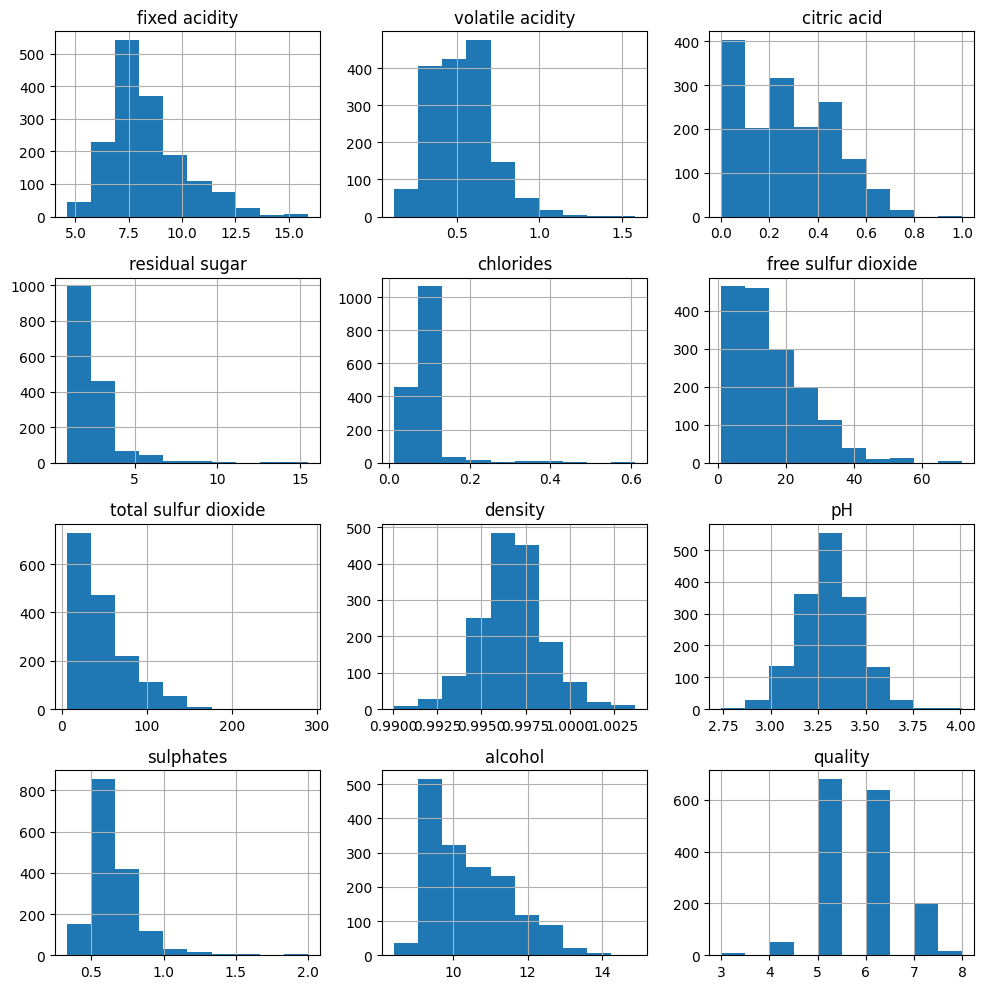

In [13]:
wine_data.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

#### Observation: From the above set of histograms, outliers are found in citric acid, residual sugar, chlorides, free sulfur dioxide and sulphates.

<Axes: >

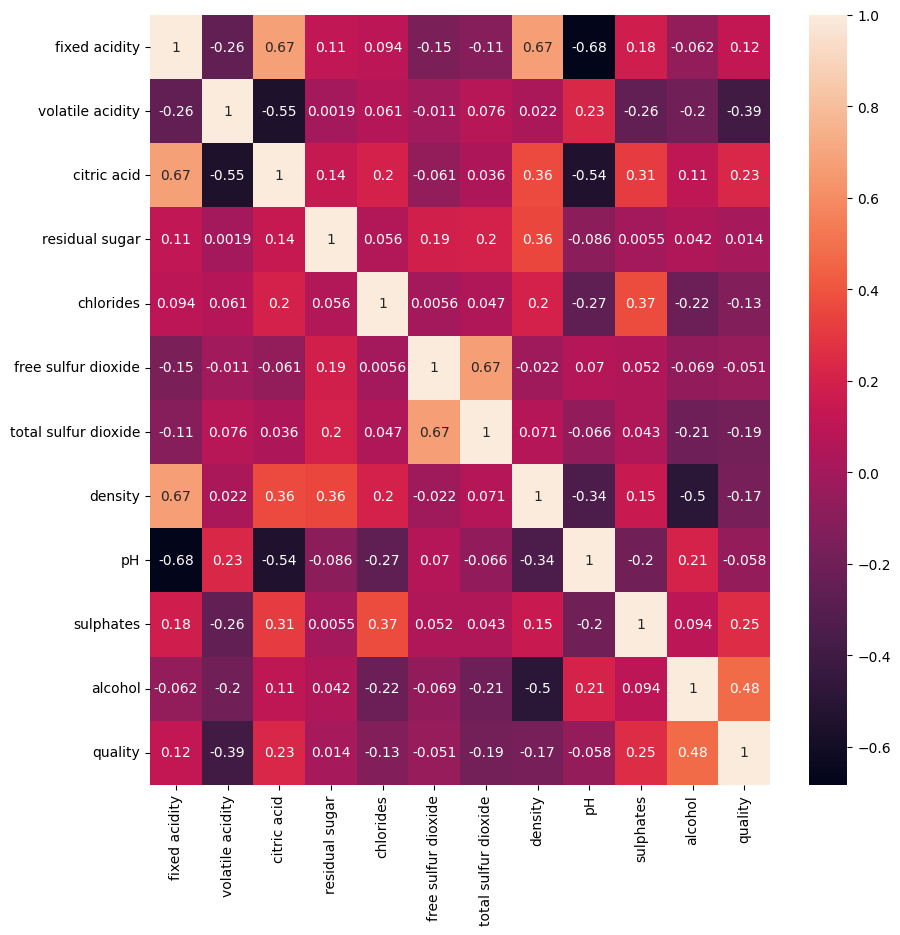

In [14]:
correlation = wine_data.corr()
plt.figure(figsize = [10,10])
sb.heatmap(correlation, annot = True)

### We can notice a positive correlation between:
<li>quality and alcohol(0.48)</li>
<li>quality and citric acid(0.23)</li>
<li>quality and sulphates(0.25)</li>

### We can notice a negative correlation between:
<li>quality and density(-0.17)</li>
<li>quality and pH(-0.058)</li>
<li>quality and volatile acidity(-0.39)</li>
<li>quality and chlorides(-0.13)</li>
<li>quality and free sulfur dioxide(-0.051)</li>
<li>quality and total sulfur dioxide(-0.19)</li>

#### From this, we can notice that (quality, alcohol), (quality, citric acid) and (quality, sulphates) have a considerable amount of positive correlation. (quality, volatile acidity) has the largest negative correlation. So, let's further plot the relationship between these variables.

[Text(0.5, 1.0, 'Alcohol Percent in Different types of quality red wine')]

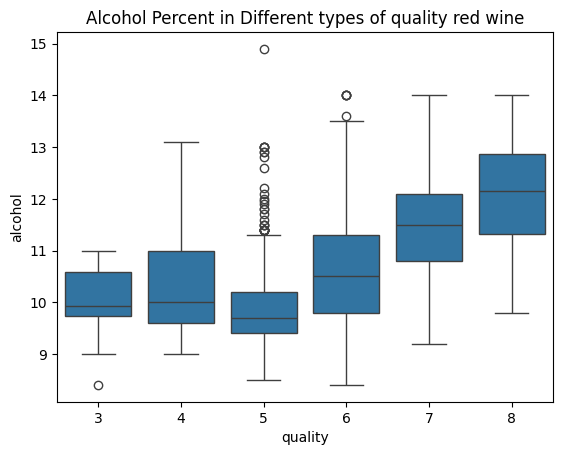

In [15]:
q_alc=sb.boxplot(x="quality",y="alcohol",data=wine_data)
q_alc.set(title="Alcohol Percent in Different types of quality red wine")

#### Observation:
#### From this plot, we can observe that as the quality of wine increases, the alcohol percent also increases except for alcohol quality of 5 and 6 which don't follow the linear trend. So, let's analyse the correlation for the wine quality of 5 and 6.

In [16]:
#Obtain the subset of data with wine quality of 5 and 6
wine_data_quality_5_6=wine_data.loc[(wine_data["quality"] >= 5) & (wine_data["quality"] <= 6)]

In [17]:
correlation_subset=wine_data_quality_5_6.corr()['quality'].sort_values(ascending=False)
print(correlation_subset)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric acid             0.080146
fixed acidity           0.053447
pH                      0.043065
residual sugar         -0.018452
free sulfur dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile acidity       -0.237193
total sulfur dioxide   -0.239067
Name: quality, dtype: float64


#### Observation:
#### From these correlation values for wine quality of 5 and 6, we can conclude that there's a positive correlation between quality and alcohol. However, the difference of values shown on boxplot can be explained due to having a poor correlation with quality.

[Text(0.5, 1.0, 'Citric Acid in Different types of quality red wine')]

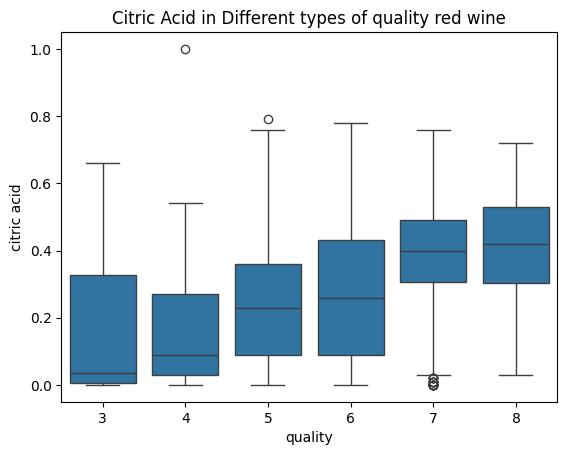

In [18]:
q_citric=sb.boxplot(x="quality",y="citric acid",data=wine_data)
q_citric.set(title="Citric Acid in Different types of quality red wine")

#### Observation:
#### From the above plot, we can notice that there's a linear correlation between quality and citric acid meaning that, as the amount of citric acid increases, the quality of wine increases.

[Text(0.5, 1.0, 'Sulphates in Different qualities of red wine')]

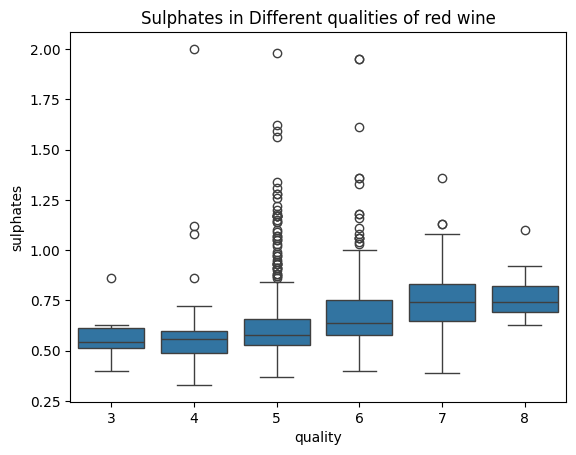

In [19]:
q_sulphates=sb.boxplot(x="quality",y="sulphates",data=wine_data)
q_sulphates.set(title="Sulphates in Different qualities of red wine")

#### Observation:
#### From the above plot, we can notice that there's a linear correlation between quality and sulphates meaning that, as the amount of sulphates increases, the quality of wine increases.

[Text(0.5, 1.0, 'Volatile Acidity in Different qualities of red wine')]

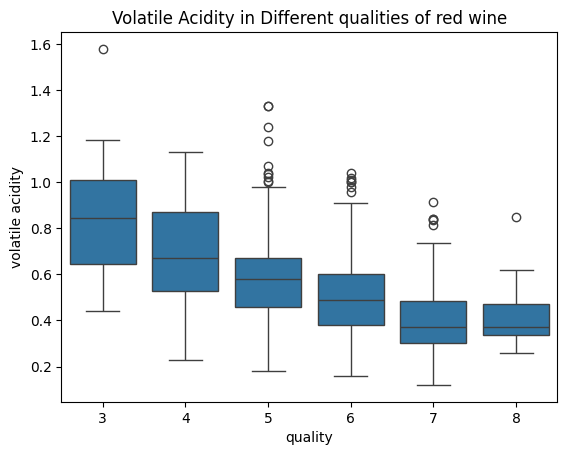

In [71]:
q_sulphates=sb.boxplot(x="quality",y="volatile acidity",data=wine_data)
q_sulphates.set(title="Volatile Acidity in Different qualities of red wine")

#### Observation:
#### From this plot, we can observe that lower quality wine has higher amount of volatile acidity while the highest quality wine has lower amount of volatile acidity.
#### In other way, we can say that as the percent of volatile acidity increases, the quality of wine decreases.

### TF Estimator DNN Classifier

In [21]:
wine_data_tf = wine_data.copy()

In [22]:
wine_data_tf.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [23]:
wine_data_tf.shape

(1599, 12)

In [24]:
wine_data_tf.rename(columns = {'fixed acidity': 'fixed_acidity',
                               'citric acid': 'citric_acid',
                               'free sulfur dioxide': 'free_sulfur_dioxide',
                               'residual sugar': 'residual_sugar',
                               'total sulfur dioxide': 'total_sulfur_dioxide',
                               'volatile acidity': 'volatile_acidity'
                              }, inplace=True)

### A copy of the original dataframe has been created and the columns containing spaces('fixed acidity', 'citric acid', 'free sulfur dioxide', 'residual sugar', 'total sulfur dioxide', 'volatile acidity') have been renamed since tensorflow model doesn't accept the column names with spaces in it.

In [25]:
wine_data_tf.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [29]:
train, test = train_test_split(wine_data_tf, test_size=0.4)

In [30]:
#Since 'quality' is the target variable(labels) , it has been removed from the features (train and test). train_y will be train labels and test_y will be test labels.
train_y = train.pop('quality')
test_y = test.pop('quality')

In [31]:
print(len(train), 'training set')
print(len(test), 'test set')

959 training set
640 test set


In [41]:
train_y.value_counts()

quality
5    402
6    396
7    111
4     31
8     10
3      9
Name: count, dtype: int64

### Define input function

#### Input function has been added to supply data for training, evaluating and prediction. The input function returns tf.data.Dataset object which outputs two-element tuple - features and labels.
#### features is a python dictionary in which each key is the name of a feature and value is an array containing all the feature's values.
#### labels is an array containing the values of the label for every set of features provided.

In [32]:
def input_fn(features, labels, shuffle=True, batch_size=32):
    #Converting the input to tf.data.Dataset
    wine_data_tf = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if shuffle:
        wine_data_tf = wine_data_tf.shuffle(1000).repeat()
    return wine_data_tf.batch(batch_size)

### Define feature columns

#### A feature column defines how the model should use the raw input data from the features dictionary. This list of feature columns will be then sent to the estimator, that describes each of the features the model uses.
#### Since the features are all numeric values, 'numeric_column' is used to tell the TF Estimator to represent each feature as a 32-bit floating-point values.

In [33]:
wine_data_tf_feature_columns = []
for key in train.keys():
    wine_data_tf_feature_columns.append(feature_column.numeric_column(key))

In [34]:
wine_data_tf_feature_columns

[NumericColumn(key='fixed_acidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='volatile_acidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='citric_acid', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='residual_sugar', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='chlorides', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='free_sulfur_dioxide', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='total_sulfur_dioxide', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='density', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pH', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sulphates', shape=(1,),

### Estimator Instantiation

#### tf.e.stimator.DNNClassifier is used for deep models that perform multi-class classification.
#### Since the highest possible value for 'quality' is 8, labels will be in the range of [0, 8]. Therefore, n_classes will be 9.

In [44]:
classifier = tf.estimator.DNNClassifier(feature_columns=wine_data_tf_feature_columns, hidden_units=[30, 10], n_classes=9)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ramya\\AppData\\Local\\Temp\\tmpq4xrwe0d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train the model

In [45]:
classifier.train(input_fn=lambda: input_fn(train, train_y, shuffle=True), steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ramya\AppData\Local\Temp\tmpq4xrwe0d\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 10.140021, step = 0
INFO:tensorflow:global_step/sec: 634.172
INFO:tensorflow:loss = 6.856486, step = 100 (0.160 sec)
INFO:tensorflow:global_step/sec: 820.421
INFO:tensorflow:loss = 3.905826, step = 200 (0.122 sec)
INFO:tensorflow:global_step/sec: 904.846
INFO:tensorflow:loss = 5.276967, step = 300 (0.111 sec)
INFO:tensorflow:global_step/sec: 899.681
INFO:tensorflow:loss = 3.6801734, step = 400 (0.111 sec)
INFO:tensorflow:global_step/sec: 975.263
INFO:tensorflow:loss = 3.4888258, ste

#### Observation: The loss has been reduced significantly from 10.140021 (step 0) to 1.044609 (step 5000).

### Evaluate the model

#### The 'steps' argument is not passed in the evaluate function. The evaluate function yields a single epoch of data.
#### 'eval_result' is a dictionary that also contains 'average_loss', 'loss' and value of the estimator's 'global_step'.

In [46]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, shuffle=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-06-03T15:08:53
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ramya\AppData\Local\Temp\tmpq4xrwe0d\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.40883s
INFO:tensorflow:Finished evaluation at 2024-06-03-15:08:53
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.4953125, average_loss = 1.1492643, global_step = 5000, loss = 1.1492643
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\ramya\AppData\Local\Temp\tmpq4xrwe0d\model.ckpt-5000


In [47]:
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.495



### Neural Network using tf.keras

In [49]:
#Since 'quality' is the target variable(Y) , it has been removed from the features (X)
X = wine_data.drop('quality', axis=1)
Y = wine_data['quality']

#### Since 'quality'(target variable) has multiple values, they have been converted from categorical to numerical so that it can be trained with a classifier.

In [50]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [51]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [52]:
Y

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

#### Since we want our input features to be on the same order of magnitude to make training easier, min-max scaler has been used for normalizing the data which scales the data between 0 and 1.

In [53]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [54]:
X_scaled

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

#### Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [55]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scaled, Y, test_size=0.3)

In [56]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [57]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1119, 11) (240, 11) (240, 11) (1119,) (240,) (240,)


In [58]:
Y_train_cat = to_categorical(Y_train, 6)
Y_val_cat = to_categorical(Y_val, 6)
Y_test_cat = to_categorical(Y_test, 6)

### Building and training the neural network

#### We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

#### - Hidden layer 1: 30 neurons, ReLU activation
#### - Hidden layer 2: 30 neurons, ReLU activation
#### - Output Layer: 6 neurons (since we have 6 different classes), Sigmoid activation

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(11, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

#### Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
#### - Telling it what algorithm you want to use to do the optimization (we'll use adam since it is best used for multi-class classification)
#### - Telling it what loss function to use (for multi-class classification, we will use categorical cross entropy)
#### - Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

#### We do so below:

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
#### - what data we are training on, which is X_train and Y_train_cat
#### - the size of our mini-batch (batch_size)
#### - how long we want to train it for (epochs)
#### - what our validation data is so that the model will tell us how we are doing on the validation data at each point.(X_val, Y_val_cat)

#### This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [61]:
hist = model.fit(X_train, Y_train_cat, batch_size=32, epochs=100, validation_data=(X_val, Y_val_cat))

Epoch 1/100
35/35 [==============================] - 0s 5ms/step - loss: 1.5802 - accuracy: 0.4218 - val_loss: 1.3952 - val_accuracy: 0.4458
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 1.2947 - accuracy: 0.4844 - val_loss: 1.1541 - val_accuracy: 0.5125
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 1.1819 - accuracy: 0.5237 - val_loss: 1.0958 - val_accuracy: 0.5250
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 1.1459 - accuracy: 0.5460 - val_loss: 1.0627 - val_accuracy: 0.5208
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 1.1183 - accuracy: 0.5505 - val_loss: 1.0448 - val_accuracy: 0.5042
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 1.0898 - accuracy: 0.5576 - val_loss: 1.0013 - val_accuracy: 0.5458
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 1.0685 - accuracy: 0.5648 - val_loss: 0.9774 - val_accuracy: 0.5625
Epoch 8/100
3

In [62]:
model.evaluate(X_test, Y_test_cat)[1]

8/8 [==============================] - 0s 1ms/step - loss: 0.9209 - accuracy: 0.6042


0.6041666865348816

### Visualizing Training and Validation loss

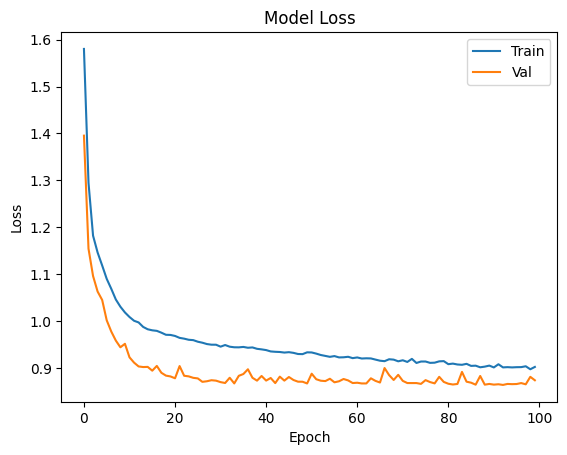

In [63]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Visualizing training and validation accuracy

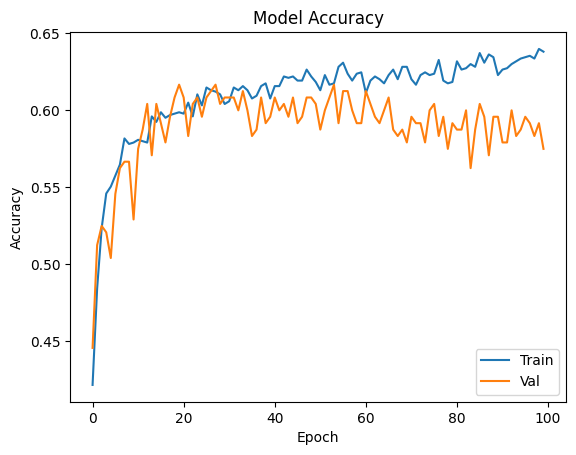

In [64]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### Observation: We can notice the model is overfitting here since the training accuracy is higher than the validation accuracy in most of the epochs.

### Adding Regularization to the Neural Network

#### L2 Regualrization and Dropout has been added to avoid overfitting

In [65]:
model_2 = tf.keras.models.Sequential([tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(11,)),
                                     tf.keras.layers.Dropout(0.3),
                                     tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                                     tf.keras.layers.Dropout(0.3),
                                     tf.keras.layers.Dense(6, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

In [66]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
hist_2 = model_2.fit(X_train, Y_train_cat, batch_size=32, epochs=100, validation_data=(X_val, Y_val_cat))

Epoch 1/100
35/35 [==============================] - 1s 4ms/step - loss: 2.1845 - accuracy: 0.3548 - val_loss: 1.9532 - val_accuracy: 0.4292
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 1.8666 - accuracy: 0.4191 - val_loss: 1.6934 - val_accuracy: 0.5042
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 1.7014 - accuracy: 0.4066 - val_loss: 1.5600 - val_accuracy: 0.4875
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 1.6287 - accuracy: 0.4263 - val_loss: 1.4777 - val_accuracy: 0.5208
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5487 - accuracy: 0.4361 - val_loss: 1.4250 - val_accuracy: 0.4500
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 1.4927 - accuracy: 0.4745 - val_loss: 1.3797 - val_accuracy: 0.5333
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 1.4455 - accuracy: 0.4647 - val_loss: 1.3445 - val_accuracy: 0.4917
Epoch 8/100
3

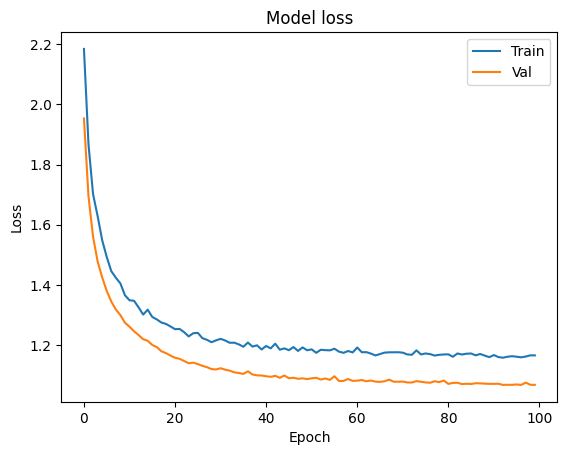

In [68]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

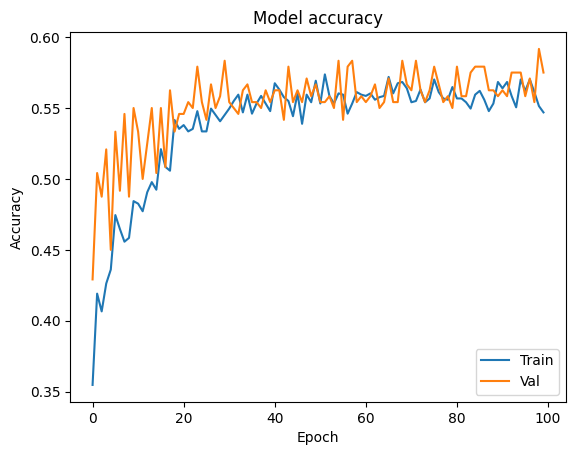

In [69]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### Observation: We can notice that the validation accuracy has improved significantly compared to the previous model without regularization and this model has validation accuracy higher than training accuracy in most of the cases.

In [70]:
model_2.evaluate(X_test, Y_test_cat)[1]

8/8 [==============================] - 0s 2ms/step - loss: 1.1013 - accuracy: 0.5875


0.5874999761581421

## Conclusion:
<li>The best quality wine in this data is at max 5 or 6. There isn't any low quality and best quality wine.</li>
<li>Alcohol, sulphates and citric acid correlate positively with the quality of the red wine whereas volatile acidity correlate negatively with the quality</li>
<li>From the feature importance scores, alcohol has the largest value in both the models which gives us a conclusion that alochol is the most contributing factor for the quality of red wine.</li>
<li> TF estimator DNN Classifier has an accuracy of 49.5% on test set and the loss has decreased significantly from 10.140021 (step 0) to 1.044609 (step 5000) as the number of steps/epochs increased. </li>
<li> TF.Keras Sequential Model has an accuracy of 60.41% on test set and 58.74% after applying L2 Regularization and Dropout. But adding the regularization and Dropout helped the model from overfitting and reduced the validation loss. </li>
<li> The validation accuracy has increased significantly than training accuracy after applying L2 Regularization and Dropout to tf.Keras Sequential neural network. </li>